log 취해서 확인하기 

In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
sys.path.insert(1, p)
sys.path.insert(1, pp)

In [2]:
#customized preprocessing pkg
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import datetime
import lib.stats.stats as st
import config.config as conf

### 소스코드 complexity 계산

In [3]:
input_year_list = ['2021', '2022', '2023']

In [4]:
input_pl = 'python'

In [5]:
# 파일 불러오기
complexity_python_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'{conf.DATA_PATH}/data/complexity_{input_pl}_df_{input_year}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        complexity_python_df = pd.concat([complexity_python_df, tmp], axis = 0)

In [6]:
print(complexity_python_df['cdate'].min())
print(complexity_python_df['cdate'].max())

2021-01-01
2023-12-03


In [7]:
# 전체 데이터셋 
with open(f'{conf.DATA_PATH}/data/complexity_src_df.pkl', 'rb') as f:
    src_df = pickle.load(f)

In [8]:
src_df.head()

,idx,id,src
0,19455,77167050,import ipywidgets as widgets\n\nquestion_label...
1,19456,77167055,"`from transformers import AutoTokenizer, AutoM..."
2,19457,77167055,error: TODO: expressions are not yet supported...
3,19458,77167101,"sql1 = ""SELECT state FROM YO WHERE function = ..."
4,19459,77167156,ldata1x\nldata2x\nldata3x\nldata4x\n


In [9]:
# 파일 불러오기
calc_com_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'{conf.DATA_PATH}/data/calc_com_df_{input_year}_{input_pl}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        calc_com_df = pd.concat([calc_com_df, tmp], axis = 0)

In [10]:
calc_com_df.reset_index(drop=True, inplace=True)

In [11]:
calc_com_df.head()

,Path,File Name,Cognitive Complexity
0,353900_65948963.py,353900_65948963.py,3
1,377254_65638981.py,377254_65638981.py,0
2,94558_69251293.py,94558_69251293.py,0
3,223504_67683129.py,223504_67683129.py,0
4,111551_69022973.py,111551_69022973.py,0


In [12]:
calc_com_df['idx'] = calc_com_df['Path'].apply(lambda x : x.split('_')[0])
# calc_com_df['Path'].apply(lambda x : [  for i in x.split('_')])

In [13]:
calc_com_df['id'] = calc_com_df['Path'].apply(lambda x : x.split('_')[1].split('.')[0])

In [14]:
calc_com_df.sort_values(by = ['idx', 'id'])

,Path,File Name,Cognitive Complexity,idx,id
164589,0_70702244.py,0_70702244.py,0,0,70702244
363420,0_74935859.py,0_74935859.py,1,0,74935859
67043,1_70397890.py,1_70397890.py,0,1,70397890
230047,1_74574281.py,1_74574281.py,6,1,74574281
427921,1_77569752.py,1_77569752.py,0,1,77569752
...,...,...,...,...,...
274042,99997_73587690.py,99997_73587690.py,6,99997,73587690
407696,99997_76005895.py,99997_76005895.py,0,99997,76005895
155471,99999_69208993.py,99999_69208993.py,0,99999,69208993
335421,99999_73587727.py,99999_73587727.py,1,99999,73587727


In [15]:
calc_com_df[['idx', 'id', 'Cognitive Complexity']] = calc_com_df[['idx', 'id', 'Cognitive Complexity']].astype('int')

In [16]:
src_df[['idx', 'id']] = src_df[['idx', 'id']].astype('int')

In [17]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482331 entries, 0 to 482330
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Path                  482331 non-null  object
 1   File Name             482331 non-null  object
 2   Cognitive Complexity  482331 non-null  int64 
 3   idx                   482331 non-null  int64 
 4   id                    482331 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.4+ MB


In [18]:
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266624 entries, 0 to 1266623
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   idx     1266624 non-null  int64 
 1   id      1266624 non-null  int64 
 2   src     1266624 non-null  object
dtypes: int64(2), object(1)
memory usage: 29.0+ MB


In [19]:
calc_com_df = pd.merge(src_df,  calc_com_df, how = 'left', on = ['idx', 'id'])

In [20]:
calc_com_df = pd.merge(complexity_python_df[['id', 'cdate']], calc_com_df, on = 'id')

In [21]:
calc_com_df.head()

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
2,70542928,2021-12-31,114,def fib(n):\n import numpy as np\n matri...,NaN,NaN,NaN
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0


In [22]:
# 일자별로 아예 소스가 수행되지 않는 건 
calc_com_df_back = calc_com_df.copy()
calc_ed_com_df = calc_com_df[~calc_com_df['Path'].isna()]

In [23]:
# calc_ed_com_df = calc_ed_com_df.sort_values(by = ['cdate', 'id', 'Cognitive Complexity'], ascending = [True, True, False]).groupby('id').head(1)

In [24]:
calc_ed_com_df['yyyymm'] = calc_ed_com_df['cdate'].str[:7]

/tmp/ipykernel_1036065/3550597121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calc_ed_com_df['yyyymm'] = calc_ed_com_df['cdate'].str[:7]


In [25]:
calc_ed_com_df

,id,cdate,idx,src,Path,File Name,Cognitive Complexity,yyyymm
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0,2021-12
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0,2021-12
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0,2021-12
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0,2021-12
6,70543017,2021-12-31,118,"data = func(""value"")\nassert all(""Yes"" in data...",118_70543017.py,118_70543017.py,0.0,2021-12
...,...,...,...,...,...,...,...,...
940792,77356328,2023-10-25,13707,import fitz # PyMuPDF library\nimport tkinter...,13707_77356328.py,13707_77356328.py,0.0,2023-10
940795,77356332,2023-10-25,13710,from datetime import datetime\nimport pandas a...,13710_77356332.py,13710_77356332.py,0.0,2023-10
940798,77356352,2023-10-25,13713,"import re\nre.match(r'^-?\d{1,3}[,.](\d{3}[,.]...",13713_77356352.py,13713_77356352.py,0.0,2023-10
940799,77356372,2023-10-25,13714,"from tkinter import Tk, Canvas, Button, Checkb...",13714_77356372.py,13714_77356372.py,2.0,2023-10


In [26]:
with open(f'{conf.DATA_PATH}/data/cc_python_raw_df.pkl', 'wb') as f:
    pickle.dump(calc_ed_com_df, f)

In [27]:
calc_ed_com_log_df = calc_ed_com_df.copy()

In [28]:
calc_ed_com_log_df['log_cc'] = np.log(calc_ed_com_log_df['Cognitive Complexity']+1)

In [29]:
calc_ed_com_log_df['cdate'] = pd.to_datetime(calc_ed_com_log_df['cdate'])

In [30]:
calc_ed_com_log_df.loc[:,  'rel_days'] = (calc_ed_com_log_df.loc[:,  'cdate'] - datetime.datetime(2022,11,30)).dt.days

In [31]:
calc_ed_com_log_df.head()

,id,cdate,idx,src,Path,File Name,Cognitive Complexity,yyyymm,log_cc,rel_days
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0,2021-12,0.0,-337
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0,2021-12,0.0,-334
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0,2021-12,0.0,-334
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0,2021-12,0.0,-334
6,70543017,2021-12-31,118,"data = func(""value"")\nassert all(""Yes"" in data...",118_70543017.py,118_70543017.py,0.0,2021-12,0.0,-334


In [32]:
chow_df = calc_ed_com_log_df[['rel_days', 'log_cc', 'cdate']]

In [33]:
chow_df = chow_df[(chow_df['rel_days']>=-365*2)&(chow_df['rel_days']<365)]

In [34]:
x = chow_df['rel_days'].values

In [35]:
np.argmax(np.where(x <= 0)) 

369162

In [36]:
chow_df = chow_df.sort_values(by = ['rel_days']).reset_index(drop=True)

In [37]:
st_chow_2year = st.Stats(chow_df['rel_days'].values, chow_df['log_cc'].values, 2, 0.95)
F_stat_2, p_value_2 = st_chow_2year.chow_test()

chow_df_1year = chow_df[chow_df['rel_days']>=-365]
st_chow_1year = st.Stats(chow_df_1year['rel_days'].values, chow_df_1year['log_cc'].values, 2, 0.95)
F_stat_1, p_value_1 = st_chow_1year.chow_test()


/home/mghan/sopjt/git/stackoverflow_src/venv_stackoverflow_src/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


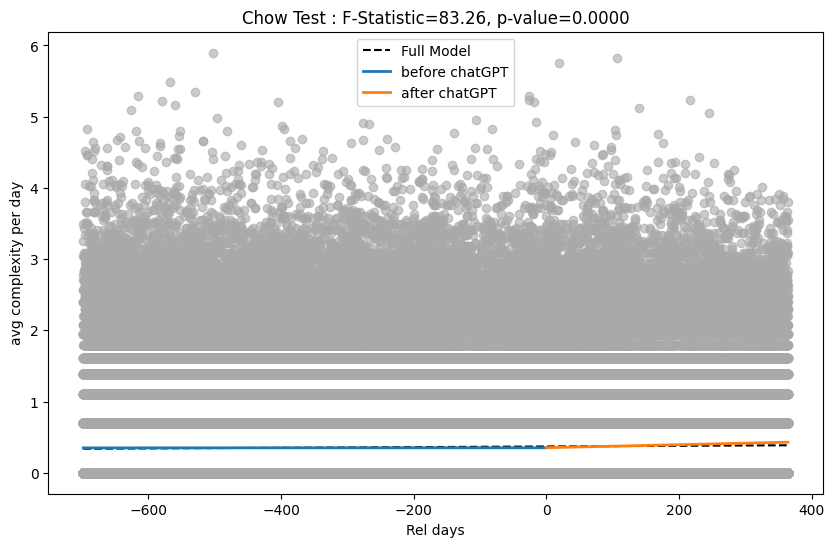

In [38]:
x = chow_df['rel_days'].values
y = chow_df['log_cc'].values

split_idx = np.argmax(np.where(x <= 0))
x1= x[:split_idx]
x2= x[split_idx:]
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y,  alpha=0.6, color='darkgray')
plt.plot(x, st_chow_2year.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x1, st_chow_2year.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x1, st_chow_2year.y1_predict - st_chow_2year.y1_conf_interval, st_chow_2year.y1_predict + st_chow_2year.y1_conf_interval, alpha=0.3)

plt.plot(x2, st_chow_2year.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x2, st_chow_2year.y2_predict - st_chow_2year.y2_conf_interval, st_chow_2year.y2_predict + st_chow_2year.y2_conf_interval, alpha=0.3)


plt.legend()
plt.title(f"Chow Test : F-Statistic={F_stat_2:.2f}, p-value={p_value_2:.4f}")
plt.xlabel("Rel days")
plt.ylabel("avg complexity per day")
plt.show()


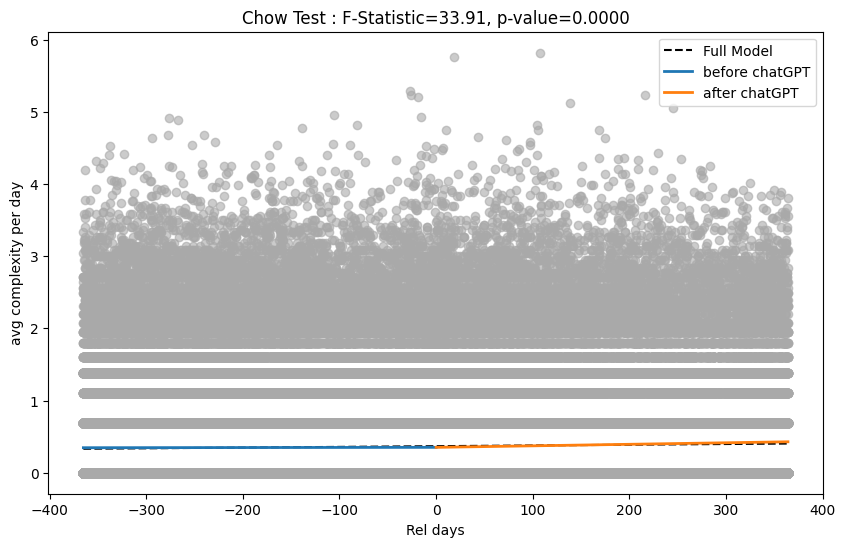

In [39]:
x = chow_df_1year['rel_days'].values
y = chow_df_1year['log_cc'].values

split_idx = np.argmax(np.where(x <= 0))
x1= x[:split_idx]
x2= x[split_idx:]
# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y,  alpha=0.6, color='darkgray')
plt.plot(x, st_chow_1year.y_predict, label="Full Model", linestyle="--", color="black")  


plt.plot(x1, st_chow_1year.y1_predict, label="before chatGPT", linewidth='2')
plt.fill_between(x1, st_chow_1year.y1_predict - st_chow_1year.y1_conf_interval, st_chow_1year.y1_predict + st_chow_1year.y1_conf_interval, alpha=0.3)

plt.plot(x2, st_chow_1year.y2_predict, label="after chatGPT", linewidth='2')
plt.fill_between(x2, st_chow_1year.y2_predict - st_chow_1year.y2_conf_interval, st_chow_1year.y2_predict + st_chow_1year.y2_conf_interval, alpha=0.3)


plt.legend()
plt.title(f"Chow Test : F-Statistic={F_stat_1:.2f}, p-value={p_value_1:.4f}")
plt.xlabel("Rel days")
plt.ylabel("avg complexity per day")
plt.show()


In [40]:

with open(f'{conf.DATA_PATH}/data/cc_python_chow_df_ver2.pkl', 'wb') as f:
    pickle.dump(chow_df, f)

In [41]:
chow_df.head()

,rel_days,log_cc,cdate
0,-698,0.000000,2021-01-01
1,-698,0.000000,2021-01-01
2,-698,1.098612,2021-01-01
3,-698,0.000000,2021-01-01
4,-698,0.693147,2021-01-01
